<a href="https://colab.research.google.com/github/Ragnavald/PDI-Processamento-Digital-de-Imagem/blob/dev/PDI_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 3

Leonardo Garcia dos Santos

Ronaldo Avila Arruda Jr.

20 de fevereiro de 2026


## Introdução

Esse relatório descreve os experimentos realizados durate o laboratório 3 de Processamento Digital de Imagens, cujo foco era na familiarização do uso da biblioteca OpenCV em Python para manipulação de imagens.

## Procedimentos

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import requests

In [ ]:
urlsImages = {
    'messiGray':'https://drive.google.com/uc?export=download&id=1EnoAoD_w_Psw4y-wW_qyyw3nOom7lup5', #messiGray
    'foto1':'https://drive.google.com/uc?export=download&id=1l3Ns5QRNQ5BT2JyzgWB1P1Lj8q-Ihg5o', #foto1
    'avatar': 'https://drive.google.com/uc?export=download&id=1AhgrJ5DitT_SwvVeYD23ZQOp9lFVTeTg' #avatar
}

In [ ]:
b) Obter com a webcam uma foto geral com TODOS os integrantes da EQUIPE, sendo que cada um
deve usar uma roupa de cor diferente, melhor se for com as cores Vermelho, Verde e Azul
destacadas. Cuidem para a iluminação ficar boa. Podem usar qualquer editor de imagem caso
necessitem “Compor” as fotos individuais para formar a foto geral.numImages = len(urlsImages)
originalImages = [None] * numImages

for i, url in enumerate(urlsImages.values()):
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    originalImages[i] = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

### Parte 1

#### (A) Leitura de imagem em arquivo:

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg',0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv.imwrite('messigray.png',img)
    cv.destroyAllWindows()

QFontDatabase: Cannot find font directory /home/ufabc/anaconda3/envs/pdi/lib/python3.13/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/ufabc/anaconda3/envs/pdi/lib/python3.13/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/ufabc/anaconda3/envs/pdi/lib/python3.13/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/ufabc/anaconda3/envs/pdi/lib/python3.13/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font director

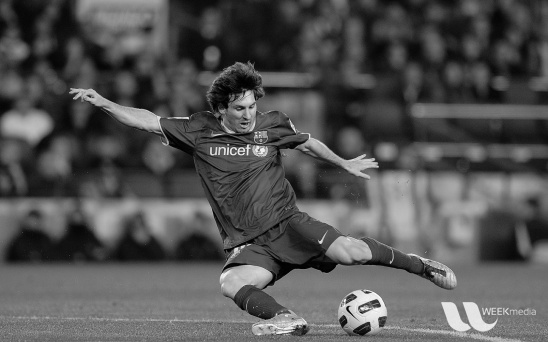

In [ ]:
cv2_imshow(originalImages[0])

O código abre essa janela com a imagem em preto e branco:



***Por que a janela aberta não mostra a imagem colorida?***

A linha que comanda o OpenCV a ler a imagem em preto e branco é a:

`img = cv.imread('messi5.jpg',0)`

O segundo parâmetro da função imread é o decoder que especifica como a imagem deve ser lida, sendo 0 a escala cinza BGR



In [ ]:
import time
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()


*Modifique o programa para que as imagens sejam exibidas mais rápidamente e depois
para que sejam exibidas mais lentamente.*

Pelo código, vemos que um frame é carregado e mostrado, para aí haver um `sleep()` com o tempo que deve ser aguardado ate a exibicao do proximo frame. Ignorando o tempo de processamento para carregar e exibir o frame (que em computadores modernos e operações simples como só leitura é negligenciavel) podemos alterar o valor dessa chamada e isso ira alterar avelocidade de reprodução do vídeo.

Diminuindo a velocidade (alterando a taxa para 10fps:

In [ ]:
import time
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/10.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Acelerando o vídeo para 200FPS:

In [ ]:
import time
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/200.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

#### (C) Leitura de imagem de câmera:

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()


modifique o programa para que uma imagem da câmera seja salva num arquivo
“foto1.png” no momento em que for clicada a tecla ‘x’ no teclado.

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    key = cv.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv.imwrite('foto1.png',frame)

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

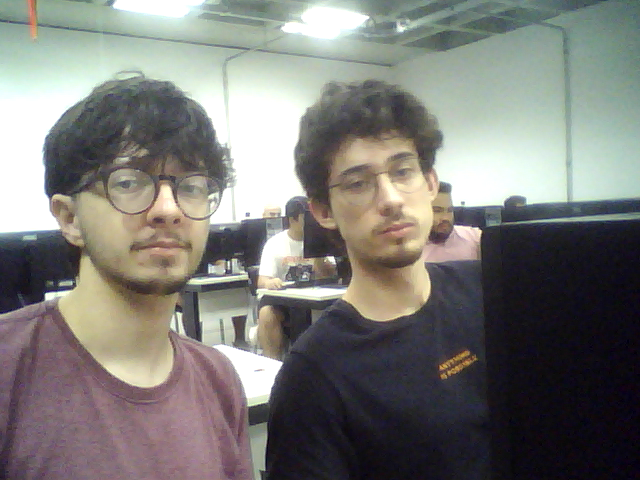

In [ ]:
cv2_imshow(originalImages[1])

#### (D) Gravação de vídeo da câmera:

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# Define Video Frame Rate in fps
fps = 10.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()


odifique o programa para que as imagens gravadas estejam “normais” no arquivo de
video salvo, e apresentem uma velocidade de exibição adequada.

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# 25fps sendo uma velocidade mais natural
fps = 25.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #desativar a linha que invertia a imagem
    #frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

Alterando o fps para 25 sendo uma velocidade mais natural. Desativar a linha `frame = cv.flip(frame, 0)`
que é responsável por girar a imagem.

### Parte 2

a) Obter com a webcam uma foto geral com TODOS os integrantes da EQUIPE, sendo que cada um
deve usar uma roupa de cor diferente, melhor se for com as cores Vermelho, Verde e Azul
destacadas. Cuidem para a iluminação ficar boa. Podem usar qualquer editor de imagem caso
necessitem “Compor” as fotos individuais para formar a foto geral.

usando o codigo do L__3_webcam.py modificado:



In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    key = cv.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv.imwrite('foto1.png',frame)

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

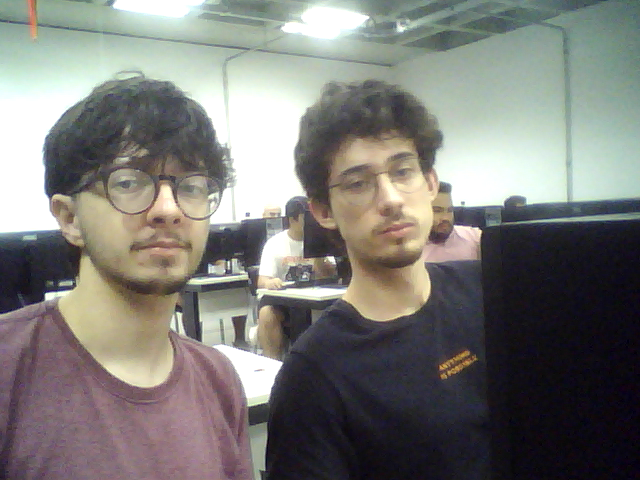

In [ ]:
cv2_imshow(originalImages[1])

b) Façam uma foto-montagem “Avatar”, juntando todos avatares numa única imagem. Meu
“Avatar” por exemplo, é o Pikachu... A ordem dos avatares deve ser a mesma da foto geral.
Podem usar qualquer editor de imagem para “Compor” as fotos individuais que cada um da
equipe vai fornecer

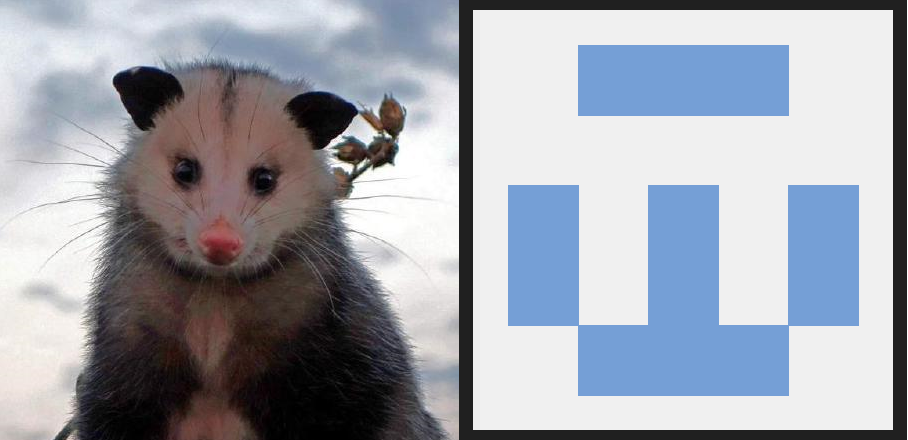

In [ ]:
cv2_imshow(originalImages[2])

c) Filmem com a webcam DOIS vídeos com pessoas e DOIS videos com um objeto:

i)
um com mudanças lentas de movimento;

ii)
e outro com mudanças rápidas de movimento.  

iii) Em cada um dos vídeos os membros da equipe DEVEM ser diferentes. Podem ser apenas
dois membros, um em cada vídeo, e sugiro escolherem os que possuem as melhores
câmeras.

usando o codigo do L__4_webcap.py modificado

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# 30fps sendo uma velocidade mais natural
fps = 30.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #desativar a linha que invertia a imagem
    #frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

i) Pessoa Lenta:
https://drive.google.com/file/d/1A8ogwMSyx4QcmR9NlqL22cd1WMsEKYIB/view?usp=drive_link

Objeto Lento:
https://drive.google.com/file/d/1XUiUIzgbS1BJAvvZjNrLFCOvRrXMSDC6/view?usp=drive_link

ii)Pessoa Rapida:
https://drive.google.com/file/d/1CjWKPRULkSyJJy3miXMZ-CKAp7l_MlAP/view?usp=drive_link

Objeto Lento
https://drive.google.com/file/d/1XUiUIzgbS1BJAvvZjNrLFCOvRrXMSDC6/view?usp=drive_link

##Conclusão


Os procedimentos deste laboratório concentraram-se nas operações básicas de manipulação de imagens e vídeos utilizando a biblioteca OpenCV. Embora sejam técnicas introdutórias, elas constituem a base para quaisquer aplicações mais avançadas.

Além disso, as atividades foram importantes para compreender detalhes do OpenCV, como a leitura de imagens em escala de cinza e em cores, bem como o controle da taxa de quadros durante a exibição de vídeos.


##Referencias

* [OpenCV Getting Started with Images:](https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html)
* [OpenCV Getting Started with Videos:](https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html)
